In [2]:
# Load packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [3]:
# extract the data
import pandas as pd
import gzip
import json

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')


In [4]:
# load the small datasets, which are json files
amazon_fashion = getDF('AMAZON_FASHION_5.json.gz')
all_beauty = getDF('All_Beauty_5.json.gz')
magazine_subscriptions = getDF('Magazine_Subscriptions_5.json.gz')

print(f"Shape of the amazon data is: {amazon_fashion.shape}")
print(f"Shape of the data is: {all_beauty.shape}")
print(f"Shape of the data is: {magazine_subscriptions.shape}")



Shape of the amazon data is: (3176, 12)
Shape of the data is: (5269, 12)
Shape of the data is: (2375, 12)


In [5]:
print(amazon_fashion.head())
print(all_beauty.head())
print(magazine_subscriptions.head())

   overall  verified  reviewTime     reviewerID        asin  \
0      5.0      True  09 4, 2015  ALJ66O1Y6SLHA  B000K2PJ4K   
1      5.0      True  09 4, 2015  ALJ66O1Y6SLHA  B000K2PJ4K   
2      5.0      True  09 4, 2015  ALJ66O1Y6SLHA  B000K2PJ4K   
3      5.0      True  09 4, 2015  ALJ66O1Y6SLHA  B000K2PJ4K   
4      5.0      True  09 4, 2015  ALJ66O1Y6SLHA  B000K2PJ4K   

                                               style reviewerName  \
0   {'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}     Tonya B.   
1  {'Size:': ' Big Boys', 'Color:': ' Black (3746...     Tonya B.   
2  {'Size:': ' Big Boys', 'Color:': ' Blue/Gray L...     Tonya B.   
3  {'Size:': ' Big Boys', 'Color:': ' Blue (37867...     Tonya B.   
4     {'Size:': ' Big Boys', 'Color:': ' Blue/Pink'}     Tonya B.   

                 reviewText     summary  unixReviewTime vote image  
0  Great product and price!  Five Stars      1441324800  NaN   NaN  
1  Great product and price!  Five Stars      1441324800  NaN   NaN  

In [6]:
# make on dataframe with all the data, and add a column to indicate the category
amazon_fashion['category'] = 'amazon_fashion'
all_beauty['category'] = 'all_beauty'
magazine_subscriptions['category'] = 'magazine_subscriptions'

# combine all the dataframes
data = pd.concat([amazon_fashion, all_beauty, magazine_subscriptions], ignore_index=True)

print(data.head())
print(data.shape)

   overall  verified  reviewTime     reviewerID        asin  \
0      5.0      True  09 4, 2015  ALJ66O1Y6SLHA  B000K2PJ4K   
1      5.0      True  09 4, 2015  ALJ66O1Y6SLHA  B000K2PJ4K   
2      5.0      True  09 4, 2015  ALJ66O1Y6SLHA  B000K2PJ4K   
3      5.0      True  09 4, 2015  ALJ66O1Y6SLHA  B000K2PJ4K   
4      5.0      True  09 4, 2015  ALJ66O1Y6SLHA  B000K2PJ4K   

                                               style reviewerName  \
0   {'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}     Tonya B.   
1  {'Size:': ' Big Boys', 'Color:': ' Black (3746...     Tonya B.   
2  {'Size:': ' Big Boys', 'Color:': ' Blue/Gray L...     Tonya B.   
3  {'Size:': ' Big Boys', 'Color:': ' Blue (37867...     Tonya B.   
4     {'Size:': ' Big Boys', 'Color:': ' Blue/Pink'}     Tonya B.   

                 reviewText     summary  unixReviewTime vote image  \
0  Great product and price!  Five Stars      1441324800  NaN   NaN   
1  Great product and price!  Five Stars      1441324800  NaN   NaN

1. Data overview

In [7]:
# The print entities/column_names in the dataset
print(data.columns)

# The print the shape of the dataset
print(f"Shape of the data is: {data.shape}")
# print the number of reviewers in the dataset
print(f"Number of unique reviewers in the dataset: {len(data.reviewerID.unique())}")
# print the number of products in the dataset
print(f"Number of products in the dataset: {len(data.asin.unique())}")
# print how many reviews are verified purchases
print(f"Number of verified purchases in the dataset: {len(data[data.verified == True])}")


Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image', 'category'],
      dtype='object')
Shape of the data is: (10820, 13)
Number of unique reviewers in the dataset: 1741
Number of products in the dataset: 273
Number of verified purchases in the dataset: 9085


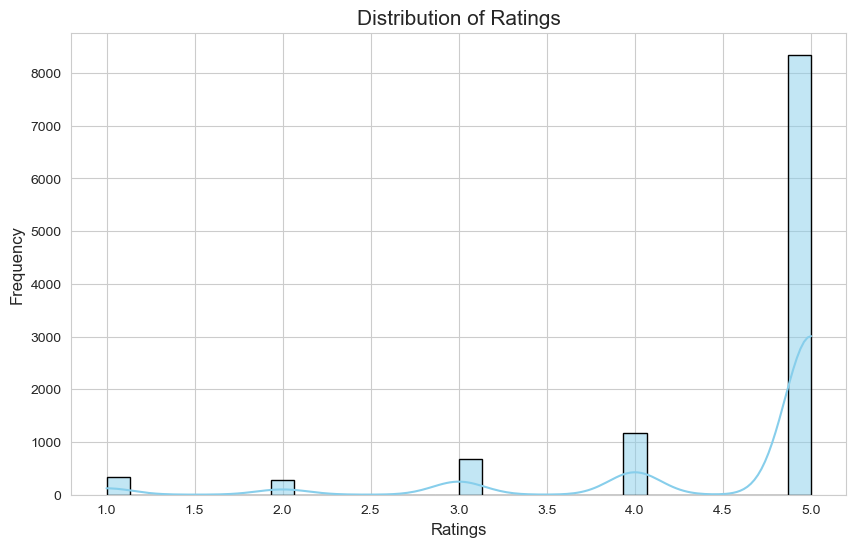

In [8]:
# Plot the distribution of the ratings

# Assuming 'data.overall' contains the ratings
ratings = data.overall

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a histogram combined with a KDE plot
plt.figure(figsize=(10, 6))
sns.histplot(ratings, bins=30, kde=True, color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Distribution of Ratings', fontsize=15)
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

Number of empty reviews: 22


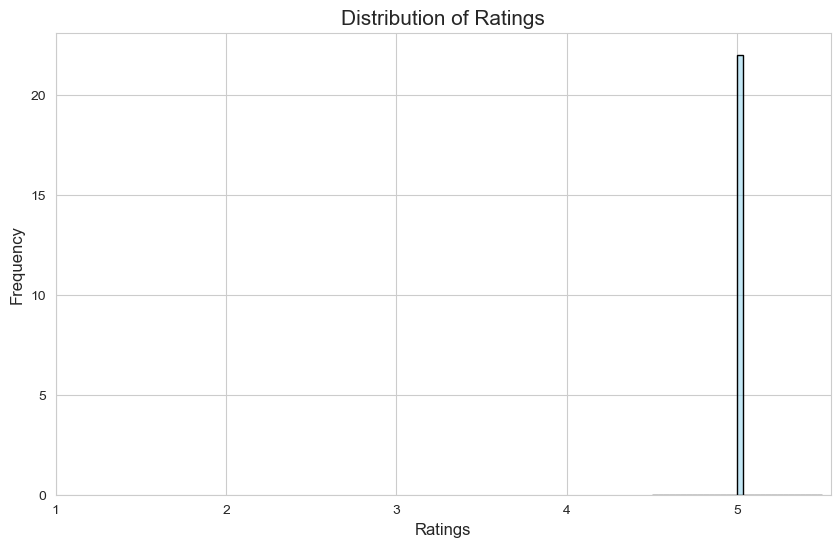

In [9]:
# plot the distribution of the ratings with respect to empty reviews, so na values
ratings_na = data[data.reviewText.isna()].overall

print(f"Number of empty reviews: {len(ratings_na)}")

# Create a histogram combined with a KDE plot
plt.figure(figsize=(10, 6))
sns.histplot(ratings_na, bins=30, kde=True, color='skyblue', edgecolor='black')

# set the xticks to be the ratings 1 to 5
plt.xticks(np.arange(1, 6, 1))
# Adding titles and labels
plt.title('Distribution of Ratings', fontsize=15)
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()


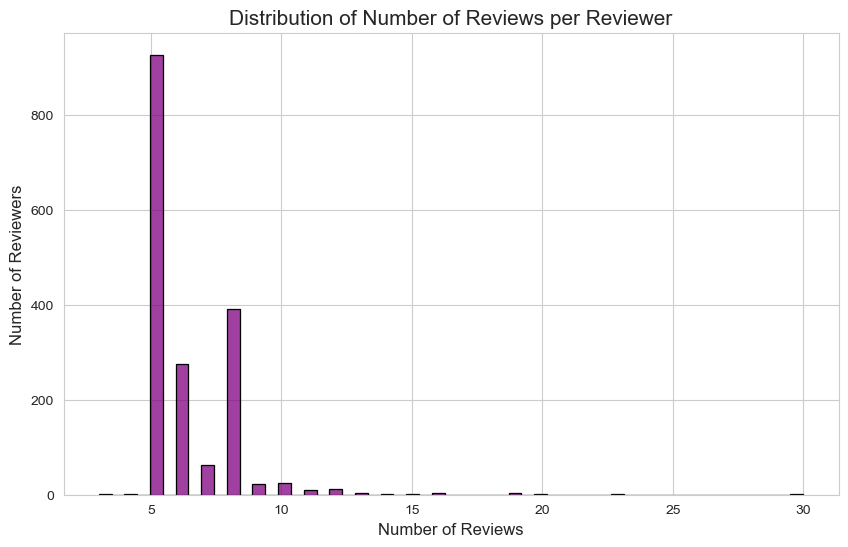

In [10]:
# plot the distribution of the how many reviews each reviewer has written
# Assuming 'data.reviewerID' contains the reviewerID
reviewers = data.reviewerID.value_counts()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(reviewers, kde=False, color='purple', edgecolor='black')

# Adding titles and labels
plt.title('Distribution of Number of Reviews per Reviewer', fontsize=15)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Number of Reviewers', fontsize=12)

# Show the plot
plt.show()

In [11]:
# set the len of na values to an epmty string
data.reviewText = data.reviewText.fillna('') 
# print the average, max, and min length of the reviews
review_lengths = [len(t) for t in data['reviewText']]
print(f"Average length of text: {np.mean(review_lengths)}")
print(f"Max length of text: {np.max(review_lengths)}")
print(f"Min length of text: {np.min(review_lengths)}")

# Distribution of review lengths

Average length of text: 206.68391866913123
Max length of text: 5567
Min length of text: 0


<Axes: ylabel='Count'>

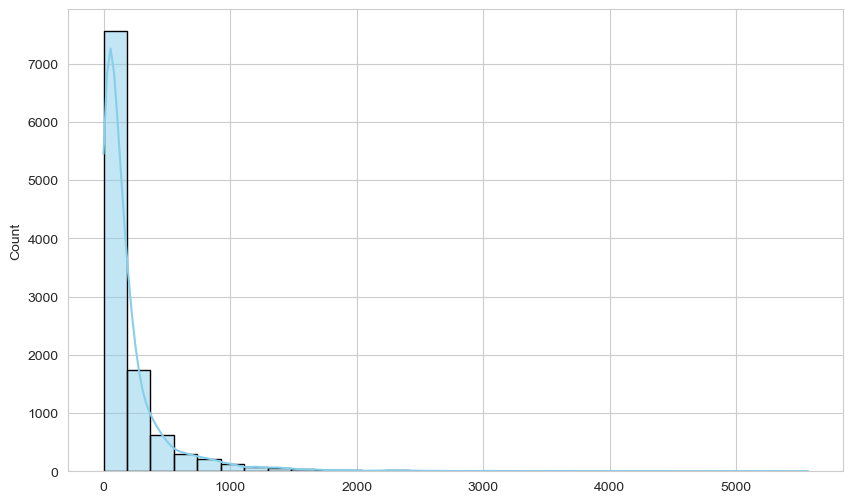

In [12]:
# plot the distribution of the review lengths
plt.figure(figsize=(10, 6))
sns.histplot(review_lengths, bins=30, kde=True, color='skyblue', edgecolor='black')


<Axes: xlabel='overall', ylabel='Count'>

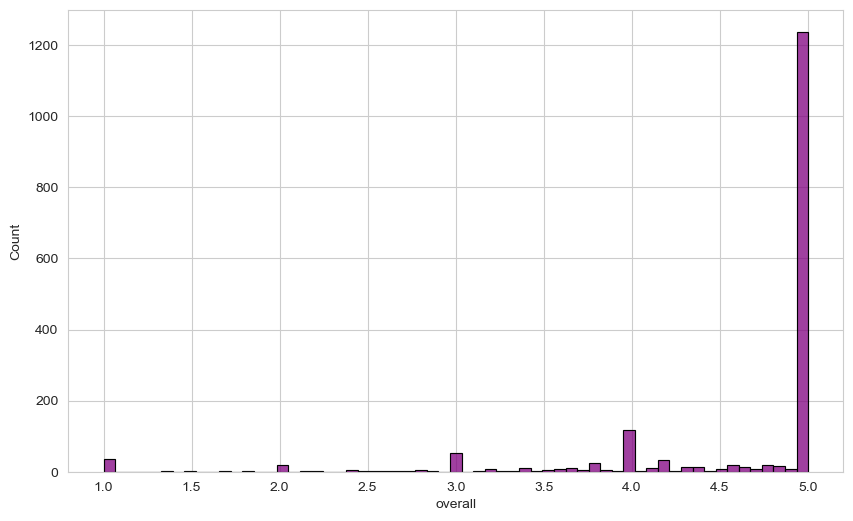

In [13]:
#plot the average rating for each individual reviewer
# Assuming 'data.reviewerID' contains the reviewerID
reviewers = data.groupby('reviewerID').overall.mean()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(reviewers, kde=False, color='purple', edgecolor='black')



Text(0, 0.5, 'Ratings')

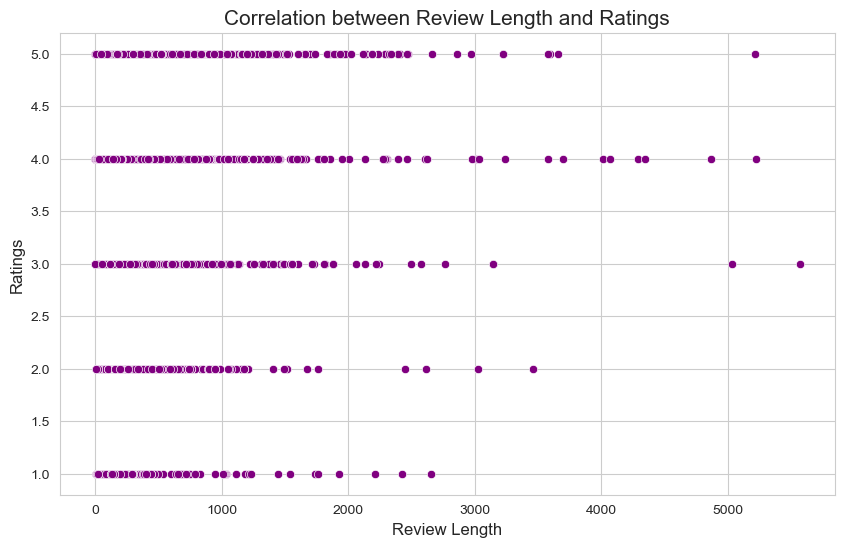

In [14]:
# look for any correlation between the length of a review and its rating

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=review_lengths, y=ratings, color='purple')

# Adding titles and labels
plt.title('Correlation between Review Length and Ratings', fontsize=15)
plt.xlabel('Review Length', fontsize=12)
plt.ylabel('Ratings', fontsize=12)

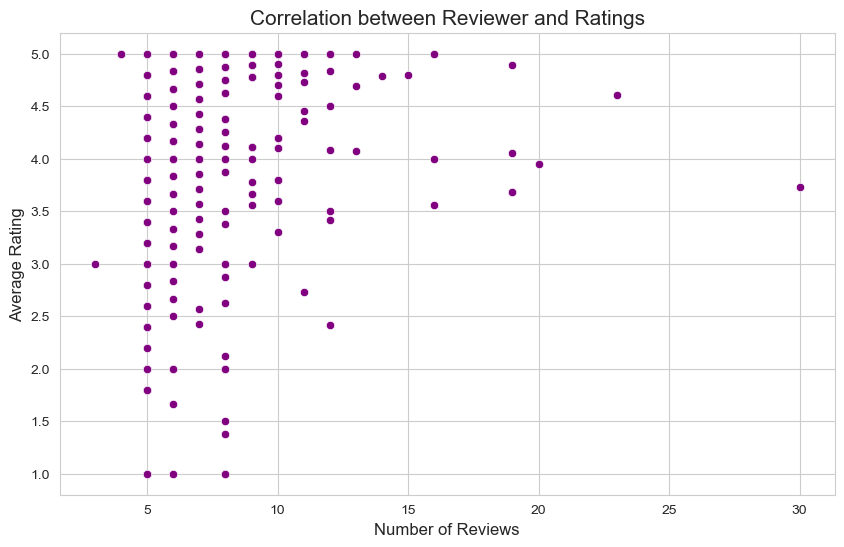

In [15]:
# plot the correlation between the number of reviews a reviewer has written and the average rating of their reviews
# Assuming 'data.reviewerID' contains the reviewerID
reviewers = data.groupby('reviewerID').overall.agg(['mean', 'count'])

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reviewers['count'], y=reviewers['mean'], color='purple')

# Adding titles and labels
plt.title('Correlation between Reviewer and Ratings', fontsize=15)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)

# Show the plot
plt.show()



In [16]:
reviewers.sort_values('count', ascending = False).head(20)

,mean,count
reviewerID,,
A3JPFWKS83R49V,3.733333,30
AKMEY1BSHSDG7,4.608696,23
A2OTUWUSH49XIN,3.950000,20
AA14AMM03HMXW,3.684211,19
AVF9FV7AMRP5C,4.052632,19
A3GA09FYFKL4EY,3.684211,19
A281NPSIMI1C2R,4.894737,19
A8N76G7E26DM4,3.562500,16
A3OP70LPLALBKN,5.000000,16


4. Frequency Analysis of words and characters

In [17]:
from wordcloud import STOPWORDS

# Retrieve the default stopwords set from WordCloud
stopwords = set(STOPWORDS)

print(stopwords)


{'ourselves', 'com', 'your', 'yourselves', 'its', 'our', 'also', "i'd", 'hers', 'did', 'whom', "she'll", 'because', "hasn't", 'him', 'is', "weren't", 'some', "i'm", 'of', 'was', 'you', 'had', 'himself', "don't", 'it', 'themselves', 'how', "i've", "you've", "shouldn't", 'were', 'have', 'since', "what's", 'no', "couldn't", 'who', 'other', 'they', 'be', 'ours', 'doing', 'their', 'why', 'can', 'too', 'both', "i'll", "who's", 'in', 'being', 'an', 'about', "they'd", 'up', 'once', "isn't", "wouldn't", "she'd", 'these', 'than', "where's", 'same', 'shall', 'she', 'nor', "they'll", "won't", 'would', 'each', 'his', 'own', 'between', 'further', 'am', 'or', 'ought', 'when', 'yours', "when's", 'into', 'there', 'for', "hadn't", 'this', 'until', 'like', 'off', "she's", 'else', 'with', 'which', 'just', 'and', 'are', 'any', 'under', "here's", 'what', 'only', 'those', "you'll", "how's", "aren't", 'i', 'ever', "shan't", 'theirs', "you'd", 'to', 'but', 'r', "we're", 'then', 'here', 'not', 'above', 'has', "

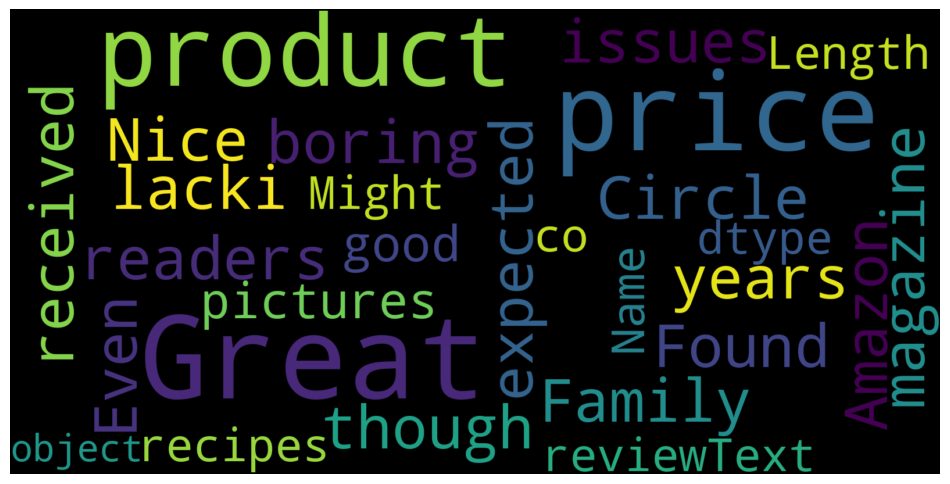

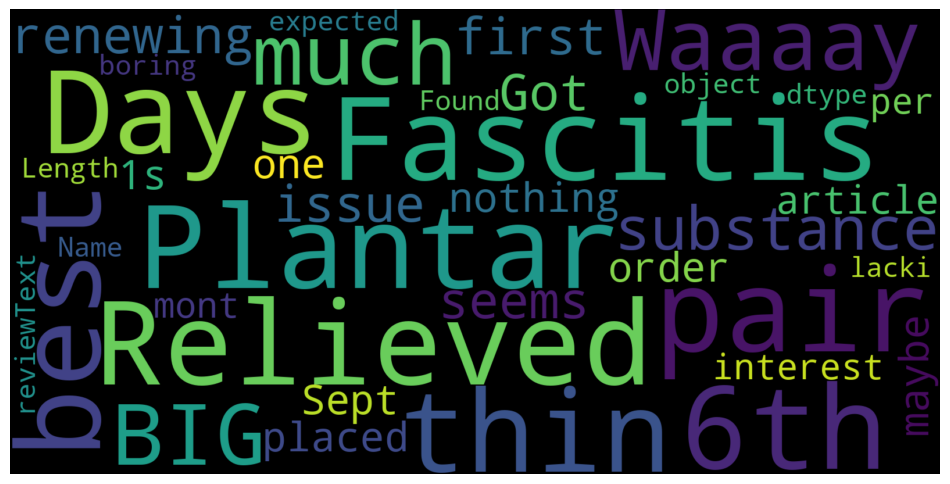

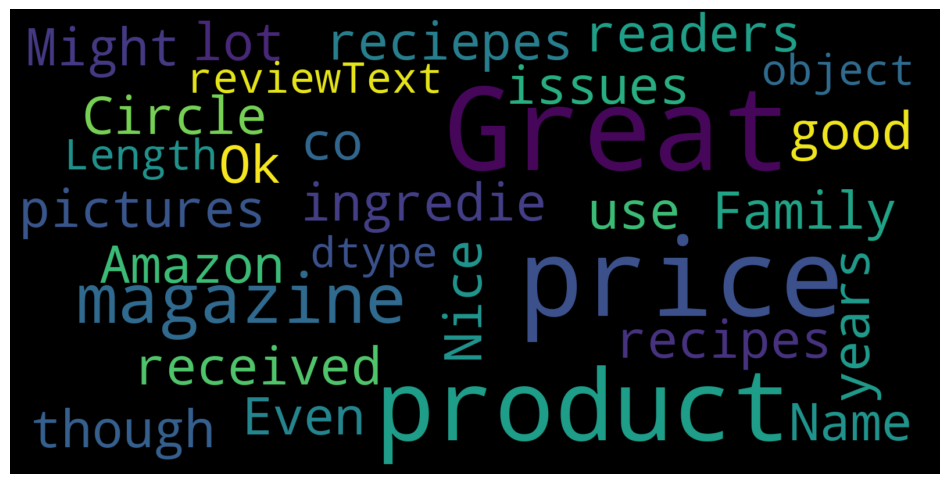

In [18]:
# word clouds or frequency histograms to identify the most frequent words and characters in the reviews

# import the wordcloud package
from wordcloud import WordCloud
# this package removes stopwords like 'the', 'a', 'an', etc.

# create a wordcloud of the reviews
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(str(data.reviewText))

# plot the wordcloud
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# create a wordcloud of the reviews with the ratings less than or equal to 2
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(str(data[data.overall <= 2].reviewText))

# plot the wordcloud
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# create a wordcloud of the reviews with the ratings greater than or equal to 4
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(str(data[data.overall >= 4].reviewText))

# plot the wordcloud
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


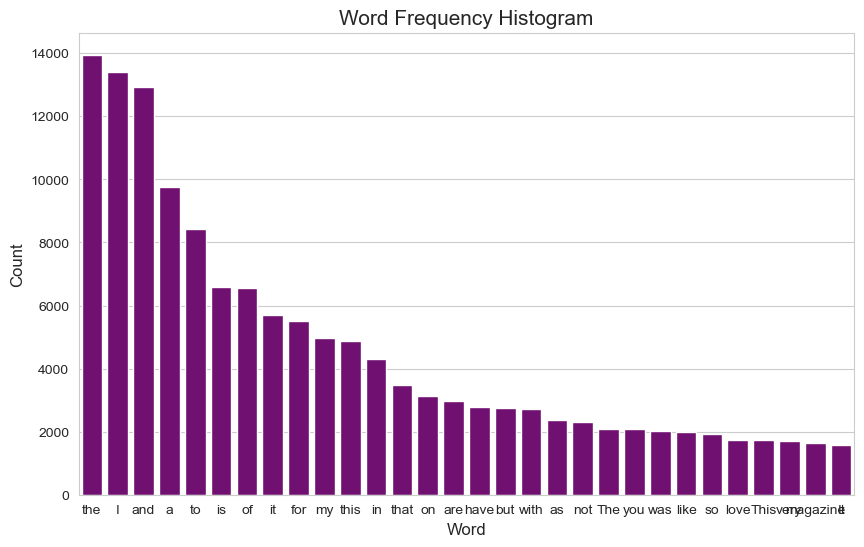

In [19]:
# word frequency histograms
from collections import Counter

# create a list of words
words = data.reviewText.str.split(expand=True).unstack().value_counts()

# create a dataframe with words and their counts
words_df = pd.DataFrame(words).reset_index()
words_df.columns = ['word', 'count']

# plot the word frequency histogram for the top 30 words
plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='count', data=words_df.head(30), color='purple')

# Adding titles and labels
plt.title('Word Frequency Histogram', fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

# this could speak for removing stopwords

{"she'd", 'what', 'those', 'with', 'of', 'www', 'that', "shouldn't", 'do', 'was', "they've", "you're", 'whom', "didn't", 'had', "shan't", "let's", 'should', 'could', "they'd", "you've", 'only', 'cannot', 'each', 'against', 'herself', 'com', 'very', 'about', 'have', "why's", 'be', 'where', "hasn't", 'itself', 'ever', 'other', 'ours', 'under', "here's", "i'm", 'to', 'own', 'out', 'further', 'her', 'your', 'get', 'i', 'below', 'just', 'nor', 'does', "doesn't", "we've", "where's", 'while', 'hence', 'are', 'hers', 'is', 'both', 'shall', 'or', 'than', 'these', 'ourselves', 'again', "there's", 'but', 'r', 'how', 'after', 'when', 'and', 'they', "you'll", 'any', 'some', 'because', 'at', 'can', 'you', 'few', 'up', 'during', 'himself', "couldn't", 'myself', 'ought', 'we', 'did', "she'll", 'being', "wouldn't", 'on', "aren't", 'before', 'yourself', 'for', 'there', 'so', 'theirs', 'otherwise', 'also', 'which', 'until', "he'd", 'his', 'not', 'above', "can't", 'him', 'its', 'themselves', "it's", 'too', 'why', "weren't", "who's", 'doing', "when's", 'more', 'as', "he'll", 'off', 'if', 'this', 'a', 'were', 'the', 'he', 'once', 'has', 'k', 'our', 'their', "what's", 'http', 'who', "isn't", 'down', 'through', 'since', 'same', "i've", 'therefore', 'by', 'me', "how's", 'them', 'such', "wasn't", 'most', "we'd", 'been', 'am', 'however', 'would', "they're", "that's", "he's", 'then', 'my', "i'd", 'in', "don't", 'like', 'between', 'having', 'over', 'it', "they'll", "hadn't", 'she', "won't", 'yourselves', 'from', 'here', 'no', "mustn't", 'an', "we'll", 'else', "i'll", "haven't", "she's", "you'd", 'yours', "we're", 'all', 'into'}


In [20]:
from wordcloud import STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# Retrieve the default stopwords set from WordCloud
stopwords = set(STOPWORDS)


Text(0.5, 0, 'Word')

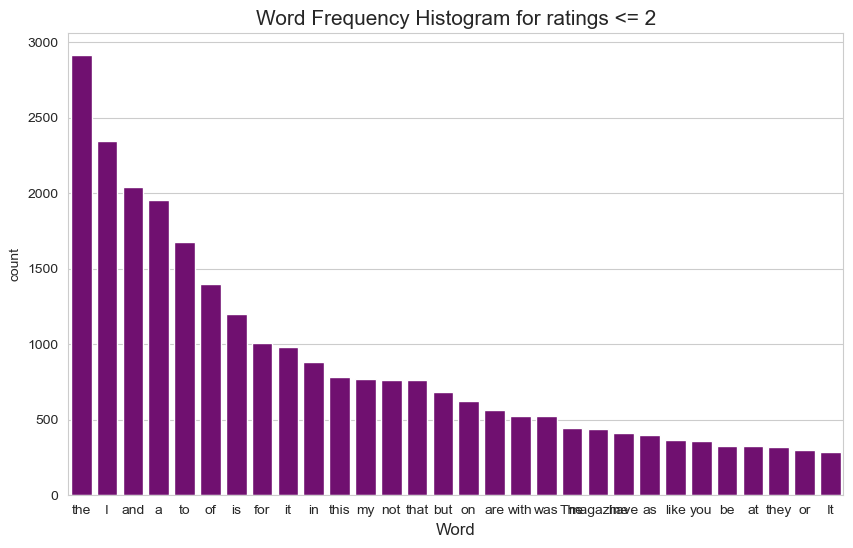

In [21]:
# plot the word frequency histogram for the top 20 words with ratings less than or equal to 3
# ratings less than or equal to 3
ratings_2 = data[data.overall <= 3].reviewText.str.split(expand=True).unstack().value_counts()

# create a dataframe with words and their counts
ratings_2_df = pd.DataFrame(ratings_2).reset_index()
ratings_2_df.columns = ['word', 'count']

# plot the word frequency histogram for the top 20 words
plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='count', data=ratings_2_df.head(30), color='purple')

# Adding titles and labels
plt.title('Word Frequency Histogram for ratings <= 2', fontsize=15)
plt.xlabel('Word', fontsize=12)


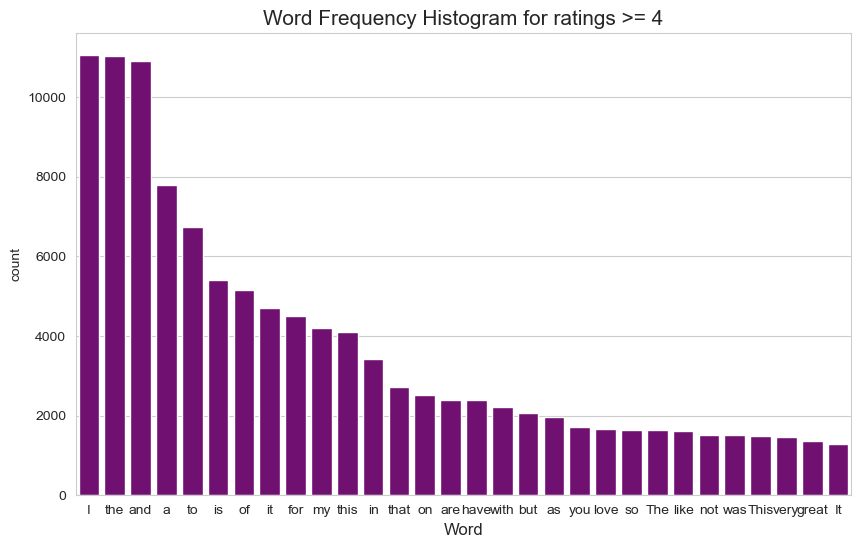

In [22]:
# plot the word frequency histogram for the top 20 words with ratings greater than or equal to 4
# ratings greater than or equal to 4
ratings_4 = data[data.overall >= 4].reviewText.str.split(expand=True).unstack().value_counts()

# create a dataframe with words and their counts
ratings_4_df = pd.DataFrame(ratings_4).reset_index()
ratings_4_df.columns = ['word', 'count']

# plot the word frequency histogram for the top 20 words
plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='count', data=ratings_4_df.head(30), color='purple')

# Adding titles and labels
plt.title('Word Frequency Histogram for ratings >= 4', fontsize=15)
plt.xlabel('Word', fontsize=12)

# Show the plot
plt.show()


Could Analysis of review summaries - simalar to 2-4

we should maybe consider removing stopwords based on this
- either by customized stopwords list or using alreay build in library
  - wordcloud uses: {"she'd", 'what', 'those', 'with', 'of', 'www', 'that', "shouldn't", 'do', 'was', "they've", "you're", 'whom', "didn't", 'had', "shan't", "let's", 'should', 'could', "they'd", "you've", 'only', 'cannot', 'each', 'against', 'herself', 'com', 'very', 'about', 'have', "why's", 'be', 'where', "hasn't", 'itself', 'ever', 'other', 'ours', 'under', "here's", "i'm", 'to', 'own', 'out', 'further', 'her', 'your', 'get', 'i', 'below', 'just', 'nor', 'does', "doesn't", "we've", "where's", 'while', 'hence', 'are', 'hers', 'is', 'both', 'shall', 'or', 'than', 'these', 'ourselves', 'again', "there's", 'but', 'r', 'how', 'after', 'when', 'and', 'they', "you'll", 'any', 'some', 'because', 'at', 'can', 'you', 'few', 'up', 'during', 'himself', "couldn't", 'myself', 'ought', 'we', 'did', "she'll", 'being', "wouldn't", 'on', "aren't", 'before', 'yourself', 'for', 'there', 'so', 'theirs', 'otherwise', 'also', 'which', 'until', "he'd", 'his', 'not', 'above', "can't", 'him', 'its', 'themselves', "it's", 'too', 'why', "weren't", "who's", 'doing', "when's", 'more', 'as', "he'll", 'off', 'if', 'this', 'a', 'were', 'the', 'he', 'once', 'has', 'k', 'our', 'their', "what's", 'http', 'who', "isn't", 'down', 'through', 'since', 'same', "i've", 'therefore', 'by', 'me', "how's", 'them', 'such', "wasn't", 'most', "we'd", 'been', 'am', 'however', 'would', "they're", "that's", "he's", 'then', 'my', "i'd", 'in', "don't", 'like', 'between', 'having', 'over', 'it', "they'll", "hadn't", 'she', "won't", 'yourselves', 'from', 'here', 'no', "mustn't", 'an', "we'll", 'else', "i'll", "haven't", "she's", "you'd", 'yours', "we're", 'all', 'into'}

In [23]:
# # we don't want to remove all stop words, as forexmaple not is very frequent in bad reviews but not the good. 
# # Therefor, we will only remove the top 20 or 30 stopwords there are frequent in both bad and good reviews

# # make a list of top 30 words from bad and good reviews and keep those that are unique
# # Sort and select top 30
# top_20_df1 = ratings_4_df.sort_values(by='count', ascending=False).head(20)
# top_20_df2 = ratings_2_df.sort_values(by='count', ascending=False).head(20)

# # Convert to sets
# set1 = set(top_20_df1['word'])
# set2 = set(top_20_df2['word'])

# # Find unique words
# unique_words_df1 = set1 - set2
# unique_words_df2 = set2 - set1

# # Combine unique words
# words_to_add_back = unique_words_df1.union(unique_words_df2)

# print(f"words to add back {words_to_add_back}")

# # Remove words from your current stopwords and add new stopwords
# customized_stopwords = stopwords - words_to_add_back

6. Category-wise Analysis

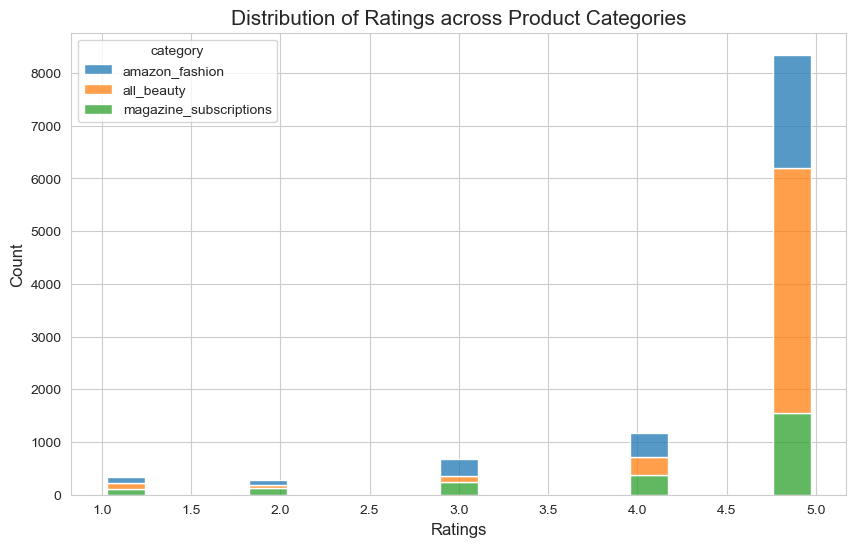

In [24]:
# Examine the distribution of ratings across different product categories

# plot the histogram of the ratings for each category of products
plt.figure(figsize=(10, 6))
sns.histplot(data, x='overall', hue='category', multiple='stack', shrink=.8)

# Adding titles and labels
plt.title('Distribution of Ratings across Product Categories', fontsize=15)
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()


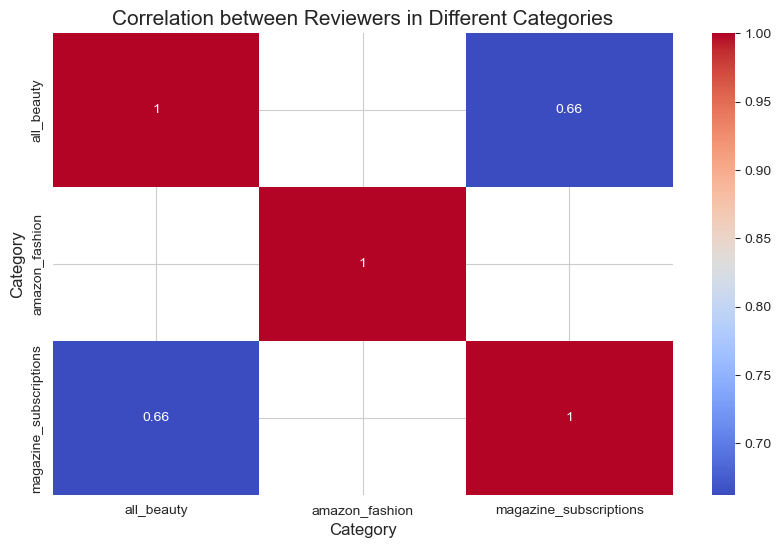

In [25]:
# check if there are any correlation between the reviewers in the different categories
# Assuming 'data.reviewerID' contains the reviewerID
reviewers = data.groupby(['reviewerID', 'category']).overall.mean().unstack()

# plot the correlation between the reviewers in the different categories
plt.figure(figsize=(10, 6))
sns.heatmap(reviewers.corr(), annot=True, cmap='coolwarm')

# Adding titles and labels
plt.title('Correlation between Reviewers in Different Categories', fontsize=15)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Category', fontsize=12)

# Show the plot
plt.show()


8. Selection of Training and Validation Sets
- including rationalization for dataset choices

- see data_prep
